In [1]:


#Import scikit-learn dataset library
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix  
from sklearn.model_selection import cross_val_score
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

#Load dataset
cancer = datasets.load_breast_cancer()

# print the names of the 13 features
print("Features: ", cancer.feature_names)

# print the label type of cancer('malignant' 'benign')
print("Labels: ", cancer.target_names)

# print data(feature)shape
print cancer.data.shape

# print the cancer data features (top 5 records)
print(cancer.data[0:5])



('Features: ', array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='|S23'))
('Labels: ', array(['malignant', 'benign'],
      dtype='|S9'))
(569L, 30L)
[[  1.79900000e+01   1.03800000e+01   1.22800000e+02   1.00100000e+03
    1.18400000e-01   2.77600000e-01   3.00100000e-01   1.47100000e-01
    2.41900000e-01   7.87100000e-02   1.09500000e+00   9.05300000e-01
    8.58900000e+00   1.53400000e+02   6

In [2]:
X = cancer.data
y = cancer.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=109) # 70% training and 30% test

clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred))

print(confusion_matrix(y_test,y_pred))  
print(classification_report(y_test,y_pred)) 
print "train accuracy: ", clf.score(X_train, y_train)
print "test accuracy: ", clf.score(X_test, y_test)

('Accuracy:', 0.96491228070175439)
('Precision:', 0.98113207547169812)
('Recall:', 0.96296296296296291)
[[ 61   2]
 [  4 104]]
             precision    recall  f1-score   support

          0       0.94      0.97      0.95        63
          1       0.98      0.96      0.97       108

avg / total       0.97      0.96      0.97       171

train accuracy:  0.962311557789
test accuracy:  0.964912280702


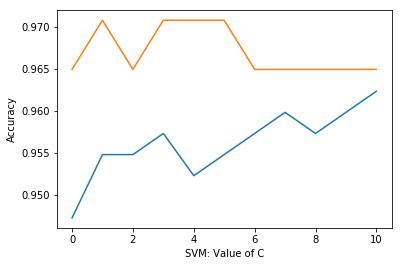

In [7]:
# Comparing parameter C:  float, optional (default=1.0) Penalty parameter C of the error term
# low c = largest margin even if accuracy low, high c = high accuracy
# https://stats.stackexchange.com/questions/31066/what-is-the-influence-of-c-in-svms-with-linear-kernel

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=109) # 70% training and 30% test
c_range = [.01,.1,.2,.3,.4,.5,.6,.7,.8,.9,.99]
ylims = [0,1,2,3,4,5,6,7,8,9,10]
train_scores = []
test_scores = []

for c in c_range:
    clf = svm.SVC(kernel='linear', C=c) # Linear Kernel
    clf.fit(X_train, y_train)
    train_scores.append(clf.score(X_train, y_train))
    test_scores.append(clf.score(X_test, y_test))
    
# plot the relationship between K and testing accuracy
plt.plot(ylims, train_scores, test_scores)
plt.xlabel('SVM: Value of C')
plt.ylabel('Accuracy')
plt.legend()


In [4]:
# https://stackabuse.com/implementing-svm-and-kernel-svm-with-pythons-scikit-learn/
# polynomial kernel
svclassifier = SVC(kernel='poly', degree=8)  
svclassifier.fit(X_train, y_train)  
y_pred = svclassifier.predict(X_test)  
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))
# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print "train accuracy: ", svclassifier.score(X_train, y_train)
print "test accuracy: ", svclassifier.score(X_test, y_test)

[[ 60   3]
 [  5 103]]
             precision    recall  f1-score   support

          0       0.92      0.95      0.94        63
          1       0.97      0.95      0.96       108

avg / total       0.95      0.95      0.95       171

('Accuracy:', 0.95321637426900585)
train accuracy:  0.891959798995
test accuracy:  0.953216374269


In [5]:
# Gaussian Kernel
svclassifier = SVC(kernel='rbf')  
svclassifier.fit(X_train, y_train)
y_pred = svclassifier.predict(X_test) 
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred)) 

[[  0  63]
 [  0 108]]
             precision    recall  f1-score   support

          0       0.00      0.00      0.00        63
          1       0.63      1.00      0.77       108

avg / total       0.40      0.63      0.49       171



C:\ProgramData\Anaconda2\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [6]:
# Sigmoid Kernel
svclassifier = SVC(kernel='sigmoid')  
svclassifier.fit(X_train, y_train)  
y_pred = svclassifier.predict(X_test) 
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred)) 

[[  0  63]
 [  0 108]]
             precision    recall  f1-score   support

          0       0.00      0.00      0.00        63
          1       0.63      1.00      0.77       108

avg / total       0.40      0.63      0.49       171



In [8]:
###### HOLDOUT ########

# Holdout 20%
X = cancer.data
y = cancer.target
X, X_test_holdout, y, y_test_holdout = train_test_split(X, y, test_size=0.2)
X_train, X_test, y_train, y_test = train_test_split(X, y)

train accuracy:  [96.577017114914426, 96.703296703296701, 98.427672955974842, 95.970695970695971, 97.797356828193841, 96.15384615384616, 98.529411764705884, 98.901098901098905, 100.0]

cv accuracy:  [95.109756097560961, 94.196301564722603, 96.500794232649085, 93.781244298485689, 94.395586297760218, 95.614035087719301, 93.391941391941401, 93.5, 90.999999999999986]



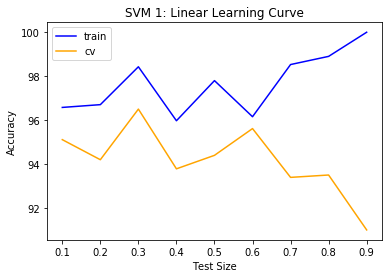

In [9]:
##### Learning Curve########

# try different test sizes and record training and testing and cv accuracy
test_size = [.1,.2,.3,.4,.5,.6,.7,.8,.9]
ylims = [0,1,2,3,4,5,6,7,8]
train_scores = []
test_scores = []
cv_scores = []
for i in test_size:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=i)
    clf = svm.SVC(kernel='linear') # Linear Kernel
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    train_scores.append(clf.score(X_train, y_train)*100)
    test_scores.append(clf.score(X_test, y_test)*100)
    cv = cross_val_score(clf, X_train, y_train, cv=10)
    cv_mean = np.array(cv).mean() * 100
    cv_scores.append(cv_mean)
    
print "train accuracy: ", train_scores
print
#print test_scores
#print
print "cv accuracy: ", cv_scores
print

plt.plot(test_size, train_scores, color='blue', label='train')
plt.plot(test_size, cv_scores, color='orange', label='cv')
plt.xlabel('Test Size')
plt.ylabel('Accuracy')
plt.title('SVM 1: Linear Learning Curve')
plt.legend()

In [ ]:
##### Learning Curve########

# try different test sizes and record training and testing and cv accuracy
test_size = [.1,.2,.3,.4,.5,.6,.7,.8,.9]
ylims = [0,1,2,3,4,5,6,7,8]
train_scores = []
test_scores = []
cv_scores = []
for i in test_size:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=i)
    clf = svm.SVC(kernel='poly', degree=8) # Poly Kernel
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    train_scores.append(clf.score(X_train, y_train)*100)
    test_scores.append(clf.score(X_test, y_test)*100)
    cv = cross_val_score(clf, X_train, y_train, cv=10)
    cv_mean = np.array(cv).mean() * 100
    cv_scores.append(cv_mean)
    
print "train accuracy: ", train_scores
print
#print test_scores
#print
print "cv accuracy: ", cv_scores
print

plt.plot(test_size, train_scores, color='blue', label='train')
plt.plot(test_size, cv_scores, color='orange', label='cv')
plt.xlabel('Test Size')
plt.ylabel('Accuracy')
plt.title('SVM 1: Polynomial Learning Curve')
plt.legend()


train accuracy:  [95.894428152492679, 96.480938416422291, 96.480938416422291, 96.187683284457478, 96.187683284457478, 96.774193548387103, 97.067448680351902, 97.067448680351902, 97.360703812316714]

cv accuracy:  [94.134453781512605, 93.840336134453779, 94.428571428571431, 94.428571428571431, 94.134453781512605, 94.134453781512605, 94.428571428571431, 94.428571428571431, 94.134453781512605]



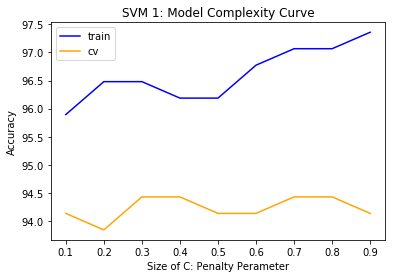

In [10]:
###### Model Complexity ########

# try differenty c metrics
X_train, X_test, y_train, y_test = train_test_split(X, y)
c_range = [.1,.2,.3,.4,.5,.6,.7,.8,.9]
train_scores = []
test_scores = []
cv_scores = []
for c in c_range:
    clf = svm.SVC(kernel='linear', C=c) # Linear Kernel
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    train_scores.append(clf.score(X_train, y_train)*100)
    test_scores.append(clf.score(X_test, y_test)*100)
    cv = cross_val_score(clf, X_train, y_train, cv=10)
    cv_mean = np.array(cv).mean() * 100
    cv_scores.append(cv_mean)

print "train accuracy: ", train_scores
print
#print test_scores
#print
print "cv accuracy: ", cv_scores
print

plt.plot(c_range, train_scores, color='blue', label='train')
plt.plot(c_range, cv_scores, color='orange', label='cv')
plt.xlabel('Size of C: Penalty Perameter')
plt.ylabel('Accuracy')
plt.title('SVM 1: Model Complexity Curve')
plt.legend()


In [11]:
##### Test Model On Holdout Group  #####

clf = svm.SVC(kernel='linear', C=0.5) # Linear Kernel
clf.fit(X, y)

y_pred = clf.predict(X_test_holdout)

print('Accuracy on the training subset: {:.3f}'.format(clf.score(X, y)))
print('Accuracy on the test subset: {:.3f}'.format(clf.score(X_test_holdout, y_test_holdout)))
print(metrics.confusion_matrix(y_test_holdout, y_pred))

Accuracy on the training subset: 0.963
Accuracy on the test subset: 0.965
[[34  3]
 [ 1 76]]


In [ ]:
#https://archive.ics.uci.edu/ml/datasets/Image+Segmentation

In [ ]:
###########  image segmentation  ########

In [12]:
import pandas as pd
data = pd.read_csv('C:/Users/443966/Desktop/image_segmentation_1.csv')
print data.shape
#print data.head()

#X = data['REGION-CENTROID-COL':'HUE-MEAN']
X = data[data.columns.difference(['CLASS'])]
y = data['CLASS']

print X.shape
print y.shape

(2310, 20)
(2310, 19)
(2310L,)


In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=109)

In [14]:
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

print(confusion_matrix(y_test,y_pred))  
print(classification_report(y_test,y_pred)) 

print "train accuracy: ", clf.score(X_train, y_train)
print "test accuracy: ", clf.score(X_test, y_test)

('Accuracy:', 0.9581529581529582)
[[ 97   0   0   0   0   0   0]
 [  0 102   0   0   0   0   0]
 [  0   0  84   1   6   1   0]
 [  3   0   0 101   7   0   0]
 [  0   0   7   4  86   0   0]
 [  0   0   0   0   0  93   0]
 [  0   0   0   0   0   0 101]]
             precision    recall  f1-score   support

          1       0.97      1.00      0.98        97
          2       1.00      1.00      1.00       102
          3       0.92      0.91      0.92        92
          4       0.95      0.91      0.93       111
          5       0.87      0.89      0.88        97
          6       0.99      1.00      0.99        93
          7       1.00      1.00      1.00       101

avg / total       0.96      0.96      0.96       693

train accuracy:  0.969696969697
test accuracy:  0.958152958153


Text(0,0.5,u'Accuracy')

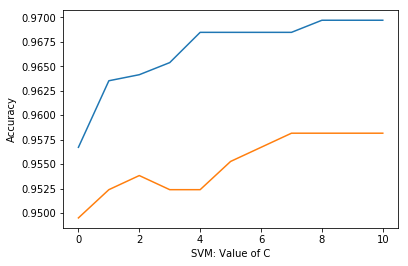

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=109)
c_range = [.01,.1,.2,.3,.4,.5,.6,.7,.8,.9,.99]
ylims = [0,1,2,3,4,5,6,7,8,9,10]
train_scores = []
test_scores = []

for c in c_range:
    clf = svm.SVC(kernel='linear', C=c) # Linear Kernel
    clf.fit(X_train, y_train)
    train_scores.append(clf.score(X_train, y_train))
    test_scores.append(clf.score(X_test, y_test))
    
# plot the relationship between K and testing accuracy
plt.plot(ylims, train_scores, test_scores)
plt.xlabel('SVM: Value of C')
plt.ylabel('Accuracy')


In [ ]:
# https://stackabuse.com/implementing-svm-and-kernel-svm-with-pythons-scikit-learn/
# polynomial kernel
svclassifier = SVC(kernel='poly', degree=8)  
svclassifier.fit(X_train, y_train)  
y_pred = svclassifier.predict(X_test)  
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))
# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print "train accuracy: ", clf.score(X_train, y_train)
print "test accuracy: ", clf.score(X_test, y_test)


In [ ]:
# Gaussian Kernel
svclassifier = SVC(kernel='rbf')  
svclassifier.fit(X_train, y_train)
y_pred = svclassifier.predict(X_test) 
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred)) 

In [ ]:
# Sigmoid Kernel
svclassifier = SVC(kernel='sigmoid')  
svclassifier.fit(X_train, y_train)  
y_pred = svclassifier.predict(X_test) 
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))

In [ ]:
# testing vs training size
# Comparing parameter C:  float, optional (default=1.0) Penalty parameter C of the error term
# low c = largest margin even if accuracy low, high c = high accuracy
# https://stats.stackexchange.com/questions/31066/what-is-the-influence-of-c-in-svms-with-linear-kernel

test_sizes = [.01,.1,.2,.3,.4,.5,.6,.7,.8,.9,.99]
ylims = [0,1,2,3,4,5,6,7,8,9,10]
train_scores = []
test_scores = []

for ts in test_sizes:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=ts,random_state=109)
    clf = svm.SVC(kernel='linear') # Linear Kernel
    clf.fit(X_train, y_train)
    train_scores.append(clf.score(X_train, y_train))
    test_scores.append(clf.score(X_test, y_test))
    
# plot the relationship between K and testing accuracy
plt.plot(ylims, train_scores, test_scores)
plt.xlabel('SVM: Value of C')
plt.ylabel('Accuracy')

In [16]:
###### HOLDOUT ########

# Holdout 20%
X = data[data.columns.difference(['CLASS'])]
y = data['CLASS']

X, X_test_holdout, y, y_test_holdout = train_test_split(X, y, test_size=0.2)
X_train, X_test, y_train, y_test = train_test_split(X, y)

train accuracy:  [96.993385447985574, 96.955345060893094, 97.757153905645794, 96.750902527075809, 97.077922077922068, 96.887686062246274, 97.292418772563167, 98.644986449864504, 97.282608695652172]

cv accuracy:  [95.737882221357822, 95.670400402077092, 96.595640288887424, 94.501093511649458, 95.122291554713627, 94.588129833248999, 93.585686042725087, 93.079340610300349, 88.581480439065587]



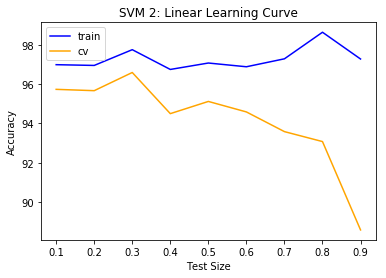

In [17]:


##### Learning Curve########

# try different test sizes and record training and testing and cv accuracy
test_size = [.1,.2,.3,.4,.5,.6,.7,.8,.9]
ylims = [0,1,2,3,4,5,6,7,8]
train_scores = []
test_scores = []
cv_scores = []
for i in test_size:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=i)
    clf = svm.SVC(kernel='linear') # Linear Kernel
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    train_scores.append(clf.score(X_train, y_train)*100)
    test_scores.append(clf.score(X_test, y_test)*100)
    cv = cross_val_score(clf, X_train, y_train, cv=10)
    cv_mean = np.array(cv).mean() * 100
    cv_scores.append(cv_mean)
    
print "train accuracy: ", train_scores
print
#print test_scores
#print
print "cv accuracy: ", cv_scores
print

plt.plot(test_size, train_scores, color='blue', label='train')
plt.plot(test_size, cv_scores, color='orange', label='cv')
plt.xlabel('Test Size')
plt.ylabel('Accuracy')
plt.title('SVM 2: Linear Learning Curve')
plt.legend()

In [ ]:
##### Learning Curve########

# try different test sizes and record training and testing and cv accuracy
test_size = [.1,.2,.3,.4,.5,.6,.7,.8,.9]
ylims = [0,1,2,3,4,5,6,7,8]
train_scores = []
test_scores = []
cv_scores = []
for i in test_size:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=i)
    clf = svm.SVC(kernel='poly', degree=8) # Poly Kernel
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    train_scores.append(clf.score(X_train, y_train)*100)
    test_scores.append(clf.score(X_test, y_test)*100)
    cv = cross_val_score(clf, X_train, y_train, cv=10)
    cv_mean = np.array(cv).mean() * 100
    cv_scores.append(cv_mean)
    
print "train accuracy: ", train_scores
print
#print test_scores
#print
print "cv accuracy: ", cv_scores
print

plt.plot(test_size, train_scores, color='blue', label='train')
plt.plot(test_size, cv_scores, color='orange', label='cv')
plt.xlabel('Test Size')
plt.ylabel('Accuracy')
plt.title('SVM 2: Polynomial Learning Curve')
plt.legend()

train accuracy:  [95.743145743145746, 96.464646464646464, 96.681096681096676, 96.897546897546889, 96.969696969696969, 96.897546897546889, 97.186147186147181, 97.186147186147181, 97.186147186147181, 97.186147186147181, 97.113997113997115]

cv accuracy:  [94.810131678218127, 95.03431766517707, 95.175103128168132, 95.24545860848977, 95.174514751205734, 95.177621627759152, 94.958099036113808, 95.243357768153629, 95.243357768153629, 95.387763982312748, 95.607286573958078]



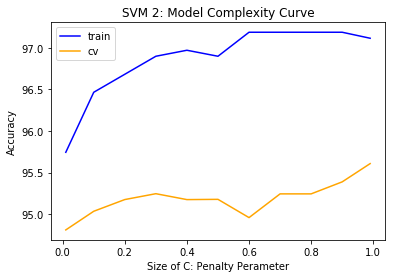

In [18]:
###### Model Complexity ########

# try differenty c metrics
X_train, X_test, y_train, y_test = train_test_split(X, y)
c_range = [.01,.1,.2,.3,.4,.5,.6,.7,.8,.9,.99]
train_scores = []
test_scores = []
cv_scores = []
for c in c_range:
    clf = svm.SVC(kernel='linear', C=c) # Linear Kernel
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    train_scores.append(clf.score(X_train, y_train)*100)
    test_scores.append(clf.score(X_test, y_test)*100)
    cv = cross_val_score(clf, X_train, y_train, cv=10)
    cv_mean = np.array(cv).mean() * 100
    cv_scores.append(cv_mean)

print "train accuracy: ", train_scores
print
#print test_scores
#print
print "cv accuracy: ", cv_scores
print

plt.plot(c_range, train_scores, color='blue', label='train')
plt.plot(c_range, cv_scores, color='orange', label='cv')
plt.xlabel('Size of C: Penalty Perameter')
plt.ylabel('Accuracy')
plt.title('SVM 2: Model Complexity Curve')
plt.legend()



In [19]:
##### Test Model On Holdout Group  #####

clf = svm.SVC(kernel='linear', C=0.4) # Linear Kernel
clf.fit(X, y)

y_pred = clf.predict(X_test_holdout)

print('Accuracy on the training subset: {:.3f}'.format(clf.score(X, y)))
print('Accuracy on the test subset: {:.3f}'.format(clf.score(X_test_holdout, y_test_holdout)))
print(metrics.confusion_matrix(y_test_holdout, y_pred))

Accuracy on the training subset: 0.969
Accuracy on the test subset: 0.974
[[75  0  0  0  0  0  0]
 [ 0 69  0  0  0  0  0]
 [ 0  0 63  0  4  0  0]
 [ 0  0  0 56  3  0  0]
 [ 1  0  2  2 51  0  0]
 [ 0  0  0  0  0 60  0]
 [ 0  0  0  0  0  0 76]]
